In [2]:
import pandas as pd
# Load dataset
crime_data = pd.read_csv(r"D:\Hussain\Sem-5\CRIMEDATA2010to2023.csv")

C:\Users\ujjai\AppData\Local\Temp\ipykernel_23656\781656855.py:3: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(r"D:\Hussain\Sem-5\CRIMEDATA2010to2023.csv")


In [4]:
print(crime_data["AREA"].max())

21


In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915401 entries, 0 to 2915400
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DR_NO         int64  
 1   DateRptd      object 
 2   TIMEOCC       int64  
 3   AREA          int64  
 4   AREANAME      object 
 5   RptDistNo     int64  
 6   Part12        int64  
 7   CrmCd         int64  
 8   CrmCdDesc     object 
 9   Mocodes       object 
 10  VictAge       int64  
 11  VictSex       object 
 12  VictDescent   object 
 13  PremisCd      object 
 14  PremisDesc    object 
 15  WeaponUsedCd  object 
 16  WeaponDesc    object 
 17  Status        object 
 18  StatusDesc    object 
 19  CrmCd1        object 
 20  CrmCd2        object 
 21  CrmCd3        object 
 22  CrmCd4        object 
 23  LOCATION      object 
 24  CrossStreet   object 
 25  LAT           float64
 26  LON           float64
 27  DATEOCC       object 
dtypes: float64(2), int64(7), object(19)
memory usage: 622.8+ MB


In [4]:
print(crime_data.isnull().sum())

DR_NO           0
DateRptd        0
TIMEOCC         0
AREA            0
AREANAME        0
RptDistNo       0
Part12          0
CrmCd           0
CrmCdDesc       0
Mocodes         0
VictAge         0
VictSex         0
VictDescent     0
PremisCd        0
PremisDesc      0
WeaponUsedCd    0
WeaponDesc      0
Status          0
StatusDesc      0
CrmCd1          0
CrmCd2          0
CrmCd3          0
CrmCd4          0
LOCATION        0
CrossStreet     0
LAT             0
LON             0
DATEOCC         0
dtype: int64


In [5]:
# Check for empty strings
empty_string_counts = (crime_data == ' ').sum()
print(empty_string_counts)

DR_NO                 0
DateRptd              0
TIMEOCC               0
AREA                  0
AREANAME              0
RptDistNo             0
Part12                0
CrmCd                 0
CrmCdDesc             0
Mocodes          339721
VictAge               0
VictSex          303205
VictDescent      303258
PremisCd             58
PremisDesc          652
WeaponUsedCd    1925157
WeaponDesc      1925158
Status                3
StatusDesc            0
CrmCd1               20
CrmCd2          2715862
CrmCd3          2909824
CrmCd4          2915238
LOCATION              0
CrossStreet     2431530
LAT                   0
LON                   0
DATEOCC               0
dtype: int64


In [6]:
crime_data.drop(["Mocodes","Status","VictSex","VictDescent","PremisCd","PremisDesc","WeaponUsedCd","WeaponDesc","CrmCd1","CrmCd2","CrmCd3","CrmCd4","CrossStreet"],axis=1,inplace=True)

In [7]:
crime_data.head()

,DR_NO,DateRptd,TIMEOCC,AREA,AREANAME,RptDistNo,Part12,CrmCd,CrmCdDesc,VictAge,StatusDesc,LOCATION,LAT,LON,DATEOCC
0,1307355,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,2/20/2010
1,11401303,09/13/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,9/12/2010
2,70309629,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,8/9/2010
3,90631215,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,Invest Cont,CAHUENGA BL,34.1016,-118.3295,1/5/2010
4,100100501,01/03/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,Invest Cont,8TH ST,34.0387,-118.2488,1/2/2010


In [8]:
# Check for empty strings
empty_string_counts = (crime_data == ' ').sum()
print(empty_string_counts)

DR_NO         0
DateRptd      0
TIMEOCC       0
AREA          0
AREANAME      0
RptDistNo     0
Part12        0
CrmCd         0
CrmCdDesc     0
VictAge       0
StatusDesc    0
LOCATION      0
LAT           0
LON           0
DATEOCC       0
dtype: int64


In [9]:


# Convert date and time columns to datetime
crime_data['DATEOCC'] = pd.to_datetime(crime_data['DATEOCC'])
crime_data['DateRptd'] = pd.to_datetime(crime_data['DateRptd'])

C:\Users\ujjai\AppData\Local\Temp\ipykernel_7888\3134734016.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DateRptd'] = pd.to_datetime(crime_data['DateRptd'])


In [10]:
# Feature extraction: Extract day, month, year, and hour from date
crime_data['Year'] = crime_data['DATEOCC'].dt.year
crime_data['Month'] = crime_data['DATEOCC'].dt.month
crime_data['DayOfWeek'] = crime_data['DATEOCC'].dt.dayofweek
crime_data['Hour'] = crime_data['TIMEOCC'] // 100  # Assuming TIMEOCC is in HHMM format

# Define time categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
crime_data['TimeOfDay'] = pd.cut(crime_data['Hour'], bins=bins, labels=labels, right=False)

# Preview the new features
print(crime_data[['DATEOCC', 'Year', 'Month', 'DayOfWeek', 'Hour', 'TimeOfDay']].head())


     DATEOCC  Year  Month  DayOfWeek  Hour  TimeOfDay
0 2010-02-20  2010      2          5    13  Afternoon
1 2010-09-12  2010      9          6     0      Night
2 2010-08-09  2010      8          0    15  Afternoon
3 2010-01-05  2010      1          1     1      Night
4 2010-01-02  2010      1          5    21    Evening


In [11]:
crime_data.head()

,DR_NO,DateRptd,TIMEOCC,AREA,AREANAME,RptDistNo,Part12,CrmCd,CrmCdDesc,VictAge,StatusDesc,LOCATION,LAT,LON,DATEOCC,Year,Month,DayOfWeek,Hour,TimeOfDay
0,1307355,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,48,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,2010-02-20,2010,2,5,13,Afternoon
1,11401303,2010-09-13,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,2010-09-12,2010,9,6,0,Night
2,70309629,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,2010-08-09,2010,8,0,15,Afternoon
3,90631215,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,47,Invest Cont,CAHUENGA BL,34.1016,-118.3295,2010-01-05,2010,1,1,1,Night
4,100100501,2010-01-03,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",47,Invest Cont,8TH ST,34.0387,-118.2488,2010-01-02,2010,1,5,21,Evening


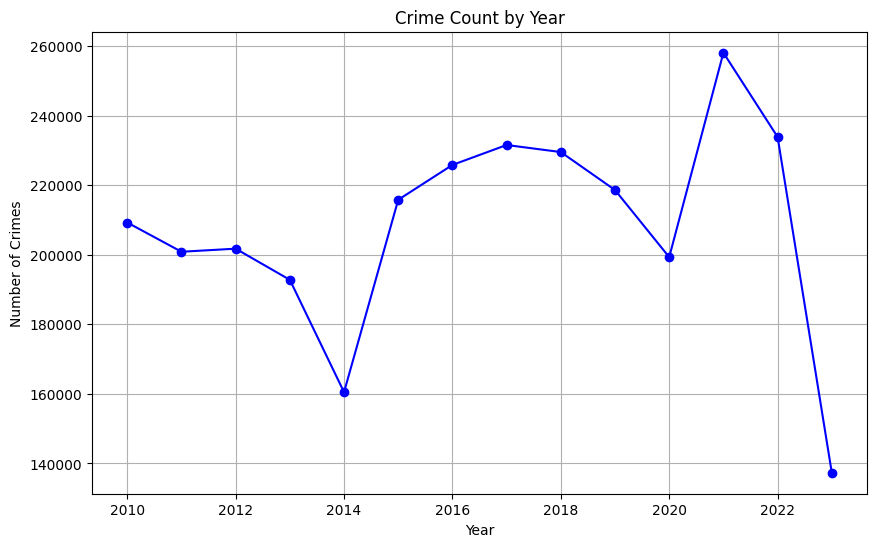

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
crime_count_by_year = crime_data.groupby('Year').size()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(crime_count_by_year.index, crime_count_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Crime Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


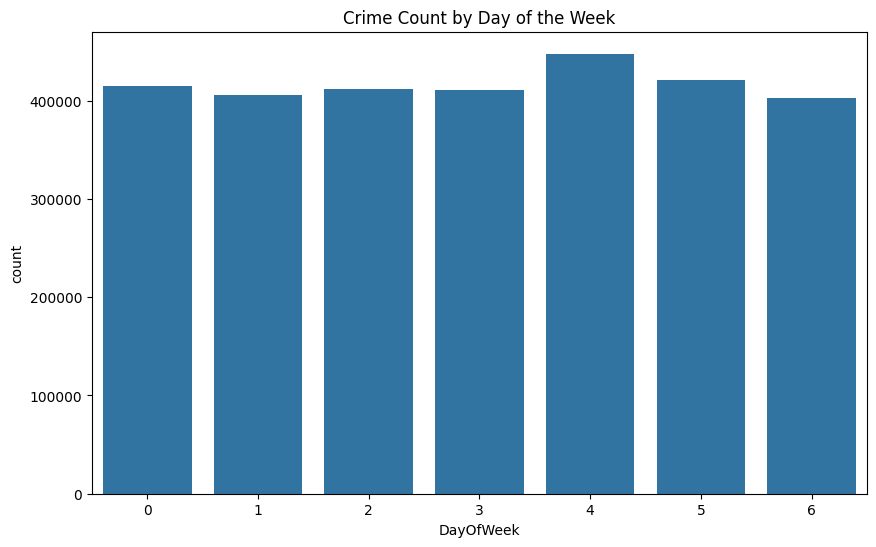

In [13]:
# Crime counts by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=crime_data)
plt.title('Crime Count by Day of the Week')
plt.show()

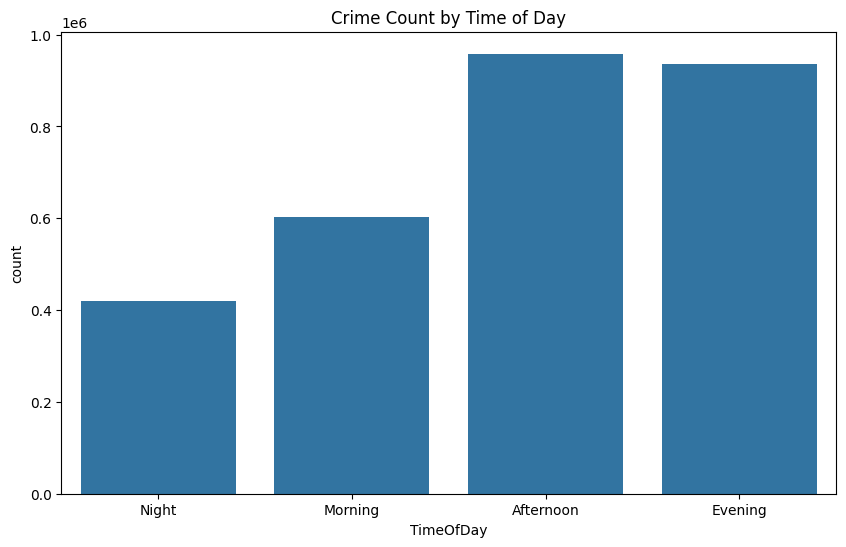

In [14]:
# Crime counts by time of day
plt.figure(figsize=(10,6))
sns.countplot(x='TimeOfDay', data=crime_data)
plt.title('Crime Count by Time of Day')
plt.show()

In [24]:
import folium
from folium.plugins import HeatMap

# Ensure the 'LON' and 'LAT' columns are numeric
crime_data['LON'] = pd.to_numeric(crime_data['LON'], errors='coerce')
crime_data['LAT'] = pd.to_numeric(crime_data['LAT'], errors='coerce')

# Remove rows with missing or invalid lat/lon values
crime_data = crime_data.dropna(subset=['LAT', 'LON'])

# Create a base map centered at the average coordinates
map_center = [crime_data['LAT'].mean(), crime_data['LON'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Prepare the data for the heatmap
heat_data = [[row['LAT'], row['LON']] for index, row in crime_data.iterrows()]

# Add the heatmap layer to the map
HeatMap(heat_data, radius=10).add_to(crime_map)

# Display the map
crime_map.save("crime_heatmap.html")

In [15]:
# Get the top 5 crime descriptions by occurrence
top_5_crimes = crime_data['CrmCdDesc'].value_counts().nlargest(5).index

# Filter the dataset to only include these top 5 crimes
top_5_crime_data = crime_data[crime_data['CrmCdDesc'].isin(top_5_crimes)]
top_5_crime_data = top_5_crime_data.reset_index(drop=True)

# Check the shape of the filtered dataset to confirm reduction
print(top_5_crime_data.head())

       DR_NO   DateRptd  TIMEOCC  AREA AREANAME  RptDistNo  Part12  CrmCd  \
0  100100508 2010-01-08     2005     1  Central        182       1    330   
1  100100521 2010-01-14     1445     1  Central        118       2    624   
2  100100564 2010-01-30     1630     1  Central        139       1    330   
3  100100570 2010-01-31      130     1  Central        139       1    440   
4  100100571 2010-01-31     1000     1  Central        192       2    624   

                            CrmCdDesc  VictAge   StatusDesc  \
0               BURGLARY FROM VEHICLE       46  Invest Cont   
1            BATTERY - SIMPLE ASSAULT       38  Invest Cont   
2               BURGLARY FROM VEHICLE       25  Invest Cont   
3  THEFT PLAIN - PETTY ($950 & UNDER)       31  Invest Cont   
4            BATTERY - SIMPLE ASSAULT       36  Adult Other   

                                  LOCATION      LAT       LON    DATEOCC  \
0          PICO                         BL  34.0389 -118.2643 2010-01-07   
1     

             DR_NO   DateRptd  TIMEOCC  AREA     AREANAME  RptDistNo  Part12  \
1096408  231209545 2023-04-04      910    12  77th Street       1233       2   
1096409  230906452 2023-03-05     1735     9     Van Nuys        926       2   
1096410  230905273 2023-02-04     1815     9     Van Nuys        979       1   
1096411  231309462 2023-04-20      900    13       Newton       1343       1   
1096412  230509679 2023-06-07     2045     5       Harbor        529       2   
1096413  231300825 2023-06-07     2203    13       Newton       1322       2   
1096414  230406516 2023-03-19      122     4   Hollenbeck        488       1   
1096415  230609209 2023-05-01      600     6    Hollywood        639       1   
1096416  231007583 2023-04-03     1600    10  West Valley       1031       1   
1096417  231104474 2023-01-12     1240    11    Northeast       1107       1   

         CrmCd                           CrmCdDesc  VictAge  ... DayOfWeek  \
1096408    624            BATTERY - SIMPL

In [48]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'AreaName' is the column that contains the area names
X = top_5_crime_data[['AREA', 'Hour', 'DayOfWeek']]
y = top_5_crime_data['CrmCdDesc']

# # Step 1: Encode the AreaName column
# label_encoder = LabelEncoder()
# X['AreaName'] = label_encoder.fit_transform(X['AreaName'])
# Use SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check the class distribution after balancing
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_res))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

# Set the batch size (number of samples in each chunk)
batch_size = 100000

# Fit the model in small batches
for i in range(0, X_train.shape[0], batch_size):
    # Extract batches from X_train and y_train
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]

    # Train the model on the current batch
    model.fit(X_batch, y_batch)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Original dataset shape: Counter({'BATTERY - SIMPLE ASSAULT': 253180, 'VEHICLE - STOLEN': 247025, 'BURGLARY FROM VEHICLE': 210931, 'BURGLARY': 195447, 'THEFT PLAIN - PETTY ($950 & UNDER)': 189835})
Resampled dataset shape: Counter({'BURGLARY FROM VEHICLE': 253180, 'BATTERY - SIMPLE ASSAULT': 253180, 'THEFT PLAIN - PETTY ($950 & UNDER)': 253180, 'BURGLARY': 253180, 'VEHICLE - STOLEN': 253180})
                                    precision    recall  f1-score   support

          BATTERY - SIMPLE ASSAULT       0.26      0.21      0.23     76029
                          BURGLARY       0.31      0.26      0.28     75990
             BURGLARY FROM VEHICLE       0.28      0.33      0.31     76064
THEFT PLAIN - PETTY ($950 & UNDER)       0.28      0.32      0.30     75766
                  VEHICLE - STOLEN       0.29      0.31      0.30     75921

                          accuracy                           0.28    379770
                         macro avg       0.28      0.29      0.28    37

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Define features and target
X = top_5_crime_data[['AREA', 'Hour', 'DayOfWeek']]
y = top_5_crime_data['CrmCdDesc']

# # Use SMOTE to oversample the minority class
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# # Check the class distribution after balancing
# print('Original dataset shape:', Counter(y))
# print('Resampled dataset shape:', Counter(y_res))
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the partial-fit classifier
model = SGDClassifier(random_state=42)

# Perform incremental learning
batch_size = 100000
for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    
    # Partial fit: Incrementally train the model on chunks of the data
    model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

# Make predictions and evaluate0.
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                    precision    recall  f1-score   support

          BATTERY - SIMPLE ASSAULT       0.21      0.52      0.30     75795
                          BURGLARY       0.13      0.02      0.03     58694
             BURGLARY FROM VEHICLE       0.19      0.12      0.14     63531
THEFT PLAIN - PETTY ($950 & UNDER)       0.19      0.31      0.23     56757
                  VEHICLE - STOLEN       0.00      0.00      0.00     74149

                          accuracy                           0.20    328926
                         macro avg       0.14      0.19      0.14    328926
                      weighted avg       0.14      0.20      0.14    328926



C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = top_5_crime_data[['AREA', 'Hour', 'DayOfWeek']]
y = top_5_crime_data['CrmCdDesc']
# Use SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Check the class distribution after balancing
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_res))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# Use the best estimator
best_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))



Original dataset shape: Counter({'BATTERY - SIMPLE ASSAULT': 253180, 'VEHICLE - STOLEN': 247025, 'BURGLARY FROM VEHICLE': 210931, 'BURGLARY': 195447, 'THEFT PLAIN - PETTY ($950 & UNDER)': 189835})
Resampled dataset shape: Counter({'BURGLARY FROM VEHICLE': 253180, 'BATTERY - SIMPLE ASSAULT': 253180, 'THEFT PLAIN - PETTY ($950 & UNDER)': 253180, 'BURGLARY': 253180, 'VEHICLE - STOLEN': 253180})
Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
                                    precision    recall  f1-score   support

          BATTERY - SIMPLE ASSAULT       0.29      0.20      0.24     76029
                          BURGLARY       0.32      0.34      0.33     75990
             BURGLARY FROM VEHICLE       0.32      0.32      0.32     76064
THEFT PLAIN - PETTY ($950 & UNDER)       0.30      0.35      0.32     75766
                  VEHICLE - STOLEN       0.32      0.34      0.33     75921

                          accuracy                           0.31    379770
                         macro avg       0.31      0.31      0.31    379770
                      weighted avg       0.31      0.31      0.31    379770



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest using the parameters from the Decision Tree
rf_model = RandomForestClassifier(
    criterion='gini', 
    max_depth=20, 
    max_features=None, 
    min_samples_leaf=1, 
    min_samples_split=20, 
    n_estimators=100,  # You can start with 100 estimators and tune it later
    random_state=42,
    class_weight='balanced'
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))


                                    precision    recall  f1-score   support

          BATTERY - SIMPLE ASSAULT       0.32      0.22      0.26     75795
                          BURGLARY       0.30      0.32      0.31     58694
             BURGLARY FROM VEHICLE       0.30      0.34      0.32     63531
THEFT PLAIN - PETTY ($950 & UNDER)       0.27      0.34      0.30     56757
                  VEHICLE - STOLEN       0.35      0.33      0.34     74149

                          accuracy                           0.31    328926
                         macro avg       0.31      0.31      0.31    328926
                      weighted avg       0.31      0.31      0.31    328926



In [24]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Concatenate AREA, Hour, and DayOfWeek into a single string
top_5_crime_data['combined_features'] = (
    'Area: ' + top_5_crime_data['AREA'].astype(str) + ' ' +
    'Hour: ' + top_5_crime_data['Hour'].astype(str) + ' ' +
    'DayOfWeek: ' + top_5_crime_data['DayOfWeek'].astype(str)
)

# Step 2: Encode the labels (CrmCdDesc) into integer values
label_encoder = LabelEncoder()
top_5_crime_data['CrmCdDesc_encoded'] = label_encoder.fit_transform(top_5_crime_data['CrmCdDesc'])

# Step 3: Perform the train-test split
train_data, test_data = train_test_split(top_5_crime_data, test_size=0.3, random_state=42)

# Step 4: Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)

# SMOTE requires numeric input, so we will temporarily hash the combined text feature into a numeric format
train_data['combined_features_encoded'] = train_data['combined_features'].apply(hash)

# Apply SMOTE on the encoded features and labels
X_resampled, y_resampled = smote.fit_resample(train_data[['combined_features_encoded']], train_data['CrmCdDesc_encoded'])

# Step 5: After resampling, map the original text features back to the resampled dataset
resampled_data = pd.DataFrame({'combined_features_encoded': X_resampled['combined_features_encoded'], 'labels': y_resampled})

# Ensure combined_features is correctly mapped back to text format
resampled_data['combined_features'] = resampled_data['combined_features_encoded'].map(
    dict(zip(train_data['combined_features_encoded'], train_data['combined_features']))
)

# Step 6: Convert resampled data back into Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(resampled_data[['combined_features', 'labels']])
test_dataset = Dataset.from_pandas(test_data[['combined_features', 'CrmCdDesc_encoded']])

# Rename the labels column in the test dataset
test_dataset = test_dataset.rename_column('CrmCdDesc_encoded', 'labels')

# Step 7: Load a smaller model (TinyBERT) and its tokenizer
model = DistilBertForSequenceClassification.from_pretrained('google/bert_uncased_L-2_H-128_A-2', num_labels=len(train_data['CrmCdDesc'].unique()))
tokenizer = DistilBertTokenizerFast.from_pretrained('google/bert_uncased_L-2_H-128_A-2')

# Ensure the 'combined_features' column contains strings before tokenization
def preprocess_function(examples):
    # Convert to string if it's not
    return tokenizer([str(x) for x in examples['combined_features']], truncation=True, padding=True)

# Apply the tokenization to both train and test datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

# Step 8: Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,      # Smaller batch size
    per_device_eval_batch_size=8,       # Same for evaluation
    gradient_accumulation_steps=4,      # Simulate larger batch size
    num_train_epochs=1,                 # Reduce epochs for quicker testing
    weight_decay=0.01,                  # Regularization via weight decay
    logging_dir='./logs',               # Directory to store logs
    logging_steps=10,                   # Log every 10 steps
    fp16=True,                          # Enable mixed precision training
)

# Step 9: Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

# Step 10: Train the model
trainer.train()

# Step 11: Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")


You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-2_H-128_A-2 and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.word_embeddings.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'transformer.layer.0.attention.k_lin.bias', 'transformer.layer.0.attention.k_lin.weight', 'transformer.layer.0.attention.out_lin.bias', 'transformer.layer.0.attention.out_lin.weight', 'transformer.layer.0.attention.q_lin.bias', 'transformer.layer.0.attention.q_lin.weight', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.weight', 'transformer.layer.0.ffn.lin1.bias', 'transformer.layer.0.ffn.lin1.weight', 'transformer.la

Map:   0%|          | 0/886925 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/328926 [00:00<?, ? examples/s]

C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\ujjai\AppData\Local\Programs\Python\Python312\Lib\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
0,1.487600,1.540132


Evaluation results: {'eval_loss': 1.5401321649551392, 'eval_runtime': 505.5124, 'eval_samples_per_second': 650.678, 'eval_steps_per_second': 81.335, 'epoch': 0.9999819602042105}


In [25]:
# Specify the directory where you want to save the model and tokenizer
save_directory = './my_saved_model'  # You can customize the path

# Save the model and tokenizer to the specified directory
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer have been saved to {save_directory}")

Model and tokenizer have been saved to ./my_saved_model
